# Example of use

In this tutorial, we give and overview of the tools that exist for working with OPTICS. First we will upload the sample data, we will provide an analogous example to that provided in the sklean [tutorial](https://scikit-learn.org/stable/auto_examples/cluster/plot_optics.html#sphx-glr-auto-examples-cluster-plot-optics-py).

We import the packages we are going to use.

In [24]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import OPTICS

And we import the functions from the tools.

In [25]:
from sklearn_optics_tools import *

## Sample data generation

This uses the same distribution from the sklean [tutorial](https://scikit-learn.org/stable/auto_examples/cluster/plot_optics.html#sphx-glr-auto-examples-cluster-plot-optics-py).

In [26]:
np.random.seed(0)
n_points_per_cluster = 250

C1 = [-5, -2] + 0.8 * np.random.randn(n_points_per_cluster, 2)
C2 = [4, -1] + 0.1 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + 0.2 * np.random.randn(n_points_per_cluster, 2)
C4 = [-2, 3] + 0.3 * np.random.randn(n_points_per_cluster, 2)
C5 = [3, -2] + 1.6 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2 * np.random.randn(n_points_per_cluster, 2)
X = np.vstack((C1, C2, C3, C4, C5, C6))

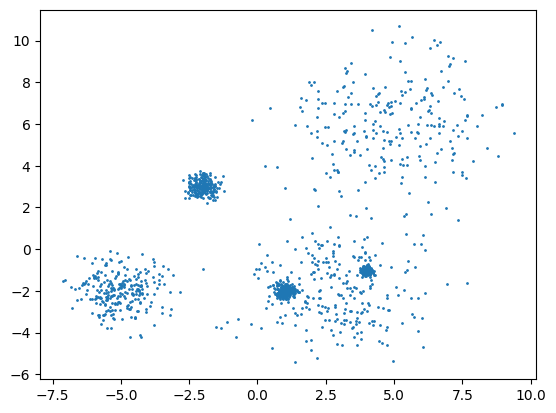

In [27]:
plt.scatter(X[:,0],X[:,1],s=1)
plt.show()

## Cluster analysis using OPTICS and the extension tools

The first step is to run the OPTICS class and fit the model.

In [28]:
model = OPTICS(min_samples=80, min_cluster_size=0.5)
model.fit(X)

OPTICS(min_cluster_size=0.5, min_samples=80)

We now have to create the hierarchical tree of clusters. This method follows the specifications described in the original (OPTICS paper)[https://dl.acm.org/doi/abs/10.1145/304181.304187].

In [29]:
tree_clusters = optics_tree(model) 

We can plot the results of the reachability plot and the clustering hierarchy.

There are a few ways in which you can plot the clusters:

 - "hierarchy"
 - "relative reachability"
 - "cluster size"

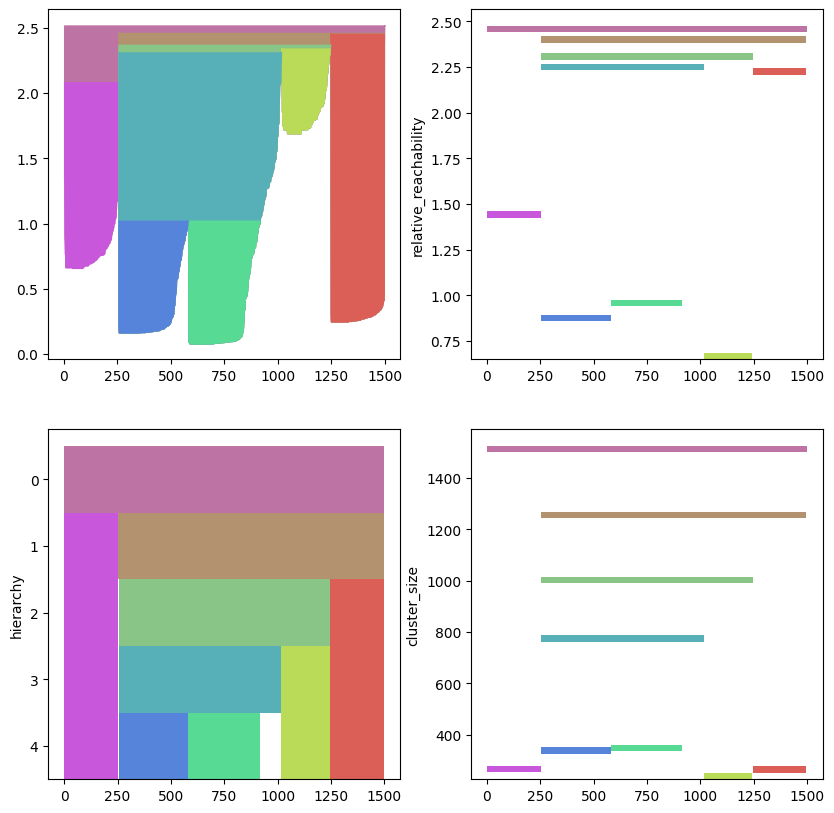

In [30]:
fig, ax = plt.subplots(2,2,figsize=[10,10])

optics_plot_reachability(model,tree_clusters,ax[0,0])
optics_plot_tree(tree_clusters,ax[1,0],flavor="hierarchy")
optics_plot_tree(tree_clusters,ax[0,1],flavor="relative_reachability")
optics_plot_tree(tree_clusters,ax[1,1],flavor="cluster_size")

plt.show()

You can get the the labels of the clusters in the leaves, the colors and plot them. 

In [31]:
labels = optics_get_labels(tree_clusters)
colors = optics_get_colors(tree_clusters)

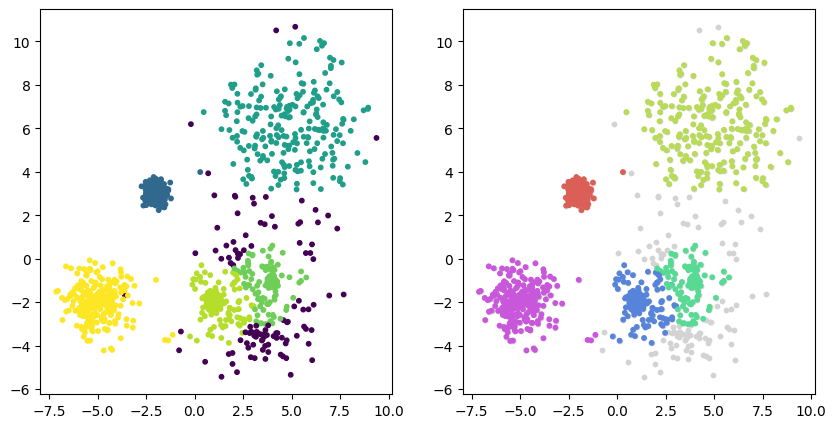

In [32]:
fig, ax = plt.subplots(1,2,figsize=[10,5])

# labels is the numeric value but does not assigna color similar to the hierarchical mappings
ax[0].scatter(X[:,0], X[:,1], s=10, c=labels)

# colors keep the hierarchy of colors
ax[1].scatter(X[:,0], X[:,1], s=10, color="lightgray")
ax[1].scatter(X[:,0], X[:,1], s=10, color=colors)

plt.show()

## Impute outliers

In case you do not want outliers, you can label all cells using a KneighborsClassifier.

In [33]:
labels_imputed = optics_label_outliers(X,labels)
colors = optics_get_colors(tree_clusters, labels=labels_imputed)

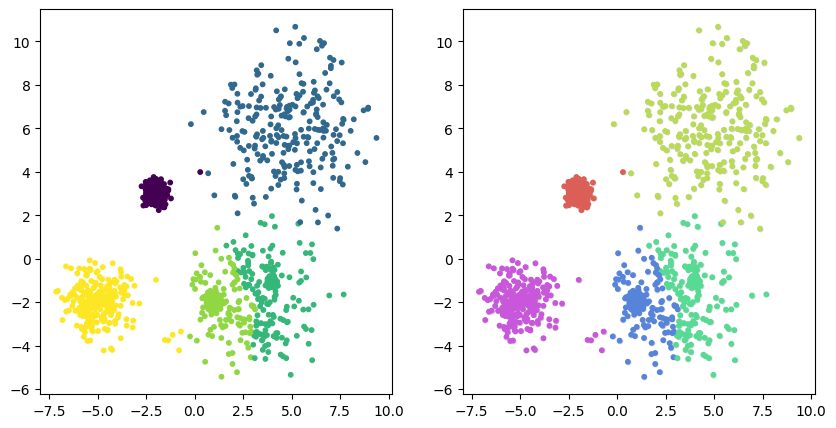

In [34]:
fig, ax = plt.subplots(1,2,figsize=[10,5])

# labels is the numeric value but does not assigna color similar to the hierarchical mappings
ax[0].scatter(X[:,0], X[:,1], s=10, c=labels_imputed)

# colors keep the hierarchy of colors
ax[1].scatter(X[:,0], X[:,1], s=10, color="lightgray")
ax[1].scatter(X[:,0], X[:,1], s=10, color=colors)

plt.show()

# Pruning the tree

You can get other hierarchies by pruning the tree cluster. For example, looking at the clustering hierarchy, we can remove hierarchy at cluster 4.

In [35]:
tree_prunned = optics_prune_tree(tree_clusters, cluster_hierarchy_max = 4)

In [36]:
labels_pruned = optics_get_labels(tree_prunned)
colors_pruned = optics_get_colors(tree_prunned)

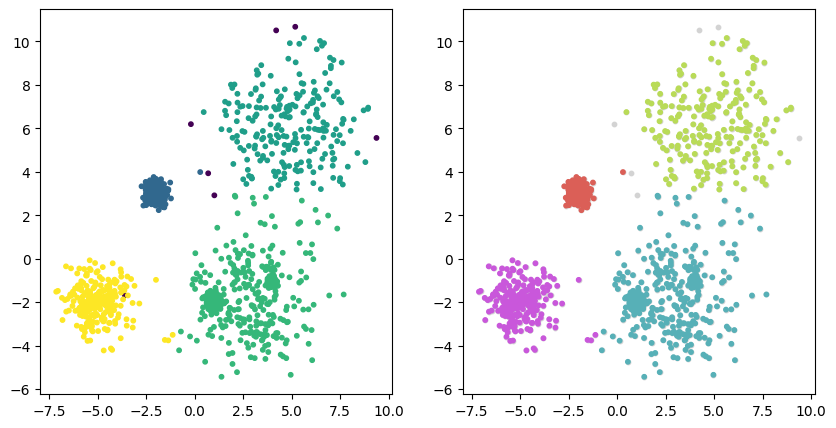

In [37]:
fig, ax = plt.subplots(1,2,figsize=[10,5])

# labels is the numeric value but does not assigna color similar to the hierarchical mappings
ax[0].scatter(X[:,0], X[:,1], s=10, c=labels_pruned)

# colors keep the hierarchy of colors
ax[1].scatter(X[:,0], X[:,1], s=10, color="lightgray")
ax[1].scatter(X[:,0], X[:,1], s=10, color=colors_pruned)

plt.show()